In [1]:
# 패션데이터 읽어들이고, 훈련/테스트 데이터 셋 분류하기 

In [2]:
import tensorflow as tr
from tensorflow import keras

In [3]:
# 케라스 내부의 fashion_mnist 이라는 데이터를 불러옴
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [4]:
# 255의 의미? => 
train_scaled = train_input / 255.0
train_scaled.shape

(60000, 28, 28)

In [5]:
# 라이브러리 호출 
from sklearn.model_selection import train_test_split

train_scaled, val_scaled,train_target, val_target = \
train_test_split (train_scaled, train_target, test_size = 0.2, random_state = 42)

print(train_scaled.shape, train_target.shape)
print (val_scaled.shape, val_target.shape)


(48000, 28, 28) (48000,)
(12000, 28, 28) (12000,)


In [6]:
# 신경망 모델 및 신경망층 생성 함수 만들기 

def model_fn(add_layer=None) :
    model = keras.Sequential()
    # 전처리 층 : 1차원으로 만들기 
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    # 은닉층(hidden layer) : 훈련에 관여 
    model.add(keras.layers.Dense(100,activation="relu"))
    
    if add_layer : 
        model.add(add_layer)
        
    #출력층 
    model.add(keras.layers.Dense(10,activation="softmax"))
    
    return model 

In [7]:
# 반복 5번을 수행하는 모델 생성하기 
model5 = model_fn()
model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 모델 설정하기 
model5.compile(loss="sparse_categorical_crossentropy",
             metrics="accuracy")
model5

In [9]:
# verbose : 0~2의 값 사용하여 출력결과 선택 가능
# - 1 : 전체 다 보여주기 (기본값) -> 주로 사용
# - 2 : 결과값만 보여주기 (진행bar가 안보임)
# - 0 : 아무것도 안보여주기(속도를 향상시키지만, 결과값 확인은 어려움)
history5 = model5.fit(train_scaled, train_target, epochs=5, verbose=1)
history5

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5301 - accuracy: 0.8133
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3891 - accuracy: 0.8603
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3528 - accuracy: 0.8732
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3324 - accuracy: 0.8818
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3199 - accuracy: 0.8863


In [10]:
# 훈련결과 확인하기 
print("반복횟수:", history5.epoch)
print("손실계수/정확도 : ", history5.history)
print("훈련결과 키워드 : ", history5.history.keys())

반복횟수: [0, 1, 2, 3, 4]
손실계수/정확도 :  {'loss': [0.5300624370574951, 0.3891109228134155, 0.352787584066391, 0.3324386477470398, 0.31985169649124146], 'accuracy': [0.8132916688919067, 0.8602708578109741, 0.8732083439826965, 0.8818125128746033, 0.8863124847412109]}
훈련결과 키워드 :  dict_keys(['loss', 'accuracy'])


In [11]:
# 훈련결과 출력하기 
# epoch= , loss= , accuracy= 형태로 출력하기
for i in history5.epoch : 
    print("epoch=",i, 
          "loss=",round(history5.history['loss'][i],4), 
          "accuracy=", round(history5.history['accuracy'][i],4))

epoch= 0 loss= 0.5301 accuracy= 0.8133
epoch= 1 loss= 0.3891 accuracy= 0.8603
epoch= 2 loss= 0.3528 accuracy= 0.8732
epoch= 3 loss= 0.3324 accuracy= 0.8818
epoch= 4 loss= 0.3199 accuracy= 0.8863


In [10]:
# 손실(loss) 곡선 그리기 
# 손실률 (손실계수)의 변화 확인가능
import matplotlib.pyplot as plt

# 한글처리 
from matplotlib import font_manager, rc
plt.rc("font", family="Malgun Gothic")

plt.plot(history5.epoch, history5.history["loss"])
plt.title("Epoch5 - loss")
plt.xlabel("epoch")
plt.ylabel("loss")

#그래프 저장하기 => 웹에서 저장한 그래프 보여주기 
# 손실은 우하향 그래프가 좋은 결과
plt.savefig("./images/01_Epoch5Loss", dpi=300)
plt.show()

NameError: name 'history5' is not defined

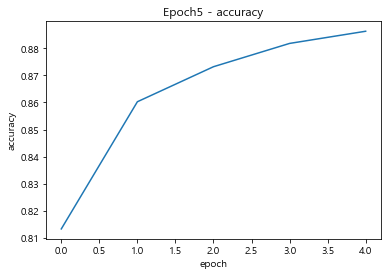

In [13]:
# 정확도(accuracy) 곡선 그리기
# 정확도의 변화 확인 가능 
plt.plot(history5.epoch, history5.history["accuracy"])
plt.title("Epoch5 - accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")

#그래프 저장하기 => 웹에서 저장한 그래프 보여주기 
# 정확도는 우상향 그래프가 좋은 결과
plt.savefig("./images/01_Epoch5Accuracy", dpi=300)
plt.show()

In [14]:
# 새로 모델 생성하고 
# 반복횟수 20회로 훈련시킨 후 
# 손실곡선과 정확도 곡선 그리기 

model20 = model_fn()
model20.compile(loss="sparse_categorical_crossentropy",
             metrics="accuracy")
history20 = model20.fit(train_scaled, train_target, epochs=20, verbose=1)

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5311 - accuracy: 0.8125
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3920 - accuracy: 0.8594
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3567 - accuracy: 0.8731
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3334 - accuracy: 0.8818
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3191 - accuracy: 0.8873
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3052 - accuracy: 0.8915
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2980 - accuracy: 0.8945
Epoch 8/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2893 - accuracy: 0.8972
Epoch 9/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2807 - accuracy: 0.9017
Epoch 10/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.276

In [15]:
def drow_plot(history_n) :
    name_list = ["loss", "accuracy"]
    for name in name_list :
        plt.plot(history_n.epoch, history_n.history[name])
        plt.title("Epoch5 - {}".format(name))
        plt.xlabel("epoch")
        plt.ylabel(name)
        plt.savefig("./images/01_Epoch20{}".format(name), dpi=300)
        plt.show()

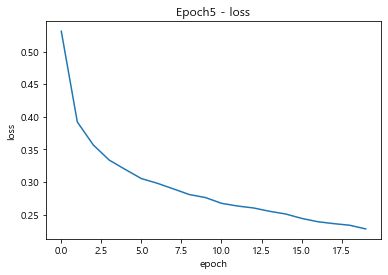

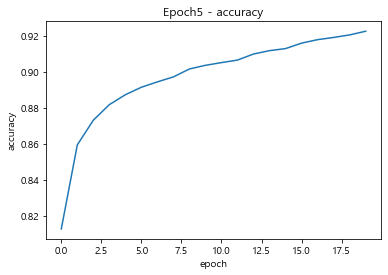

In [16]:
drow_plot(history20)

In [18]:
# 모델 훈련 및 검증을 동시에 수행하기 
model = model_fn()
model.compile(loss="sparse_categorical_crossentropy",
             metrics="accuracy")

# 훈련과 검증을 동시에 훈련
history = model.fit(train_scaled, train_target,epochs=20, verbose=1,
                   validation_data=(val_scaled, val_target))
history

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5318 - accuracy: 0.8146 - val_loss: 0.4295 - val_accuracy: 0.8485
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3932 - accuracy: 0.8577 - val_loss: 0.3710 - val_accuracy: 0.8664
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3546 - accuracy: 0.8729 - val_loss: 0.3731 - val_accuracy: 0.8668
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3336 - accuracy: 0.8807 - val_loss: 0.3673 - val_accuracy: 0.8704
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3179 - accuracy: 0.8865 - val_loss: 0.3527 - val_accuracy: 0.8792
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3067 - accuracy: 0.8907 - val_loss: 0.3525 - val_accuracy: 0.8794
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2968 - accuracy: 0.8948 - val_loss: 0.3663 - val_accuracy:

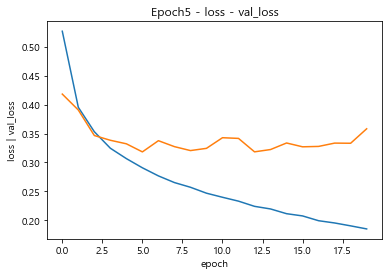

In [45]:
# 훈련 및 검증에 대한 손실곡선을 하나의 그래프에 그리기
history.history.keys()

plt.plot(history.epoch, history.history['loss'], history.history['val_loss'])
plt.title("Epoch5 - loss - val_loss")
plt.xlabel("epoch")
plt.ylabel("loss | val_loss")
plt.savefig("./images/01_Epoch20_loss&val_loss", dpi=300)
plt.show()

In [19]:
# model_fn() 함수 이용해서 모델 생성하기 : 모델변수 : model
# 옵티마이저 adam 알고리즘으로 모델 설정하기 
# 훈련과 검증데이터로 훈련 시키기 : 훈련결과변수 => history 

model = model_fn()
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics="accuracy")

history = model.fit(train_scaled, train_target,epochs=20, verbose=1,
                   validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5267 - accuracy: 0.8161 - val_loss: 0.4182 - val_accuracy: 0.8555
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3953 - accuracy: 0.8598 - val_loss: 0.3907 - val_accuracy: 0.8613
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3531 - accuracy: 0.8721 - val_loss: 0.3466 - val_accuracy: 0.8758
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3246 - accuracy: 0.8809 - val_loss: 0.3384 - val_accuracy: 0.8750
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3067 - accuracy: 0.8878 - val_loss: 0.3323 - val_accuracy: 0.8782
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2908 - accuracy: 0.8929 - val_loss: 0.3183 - val_accuracy: 0.8852
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2768 - accuracy: 0.8973 - val_loss: 0.3377 - val_accuracy:

In [23]:
# 0.1 이상 차이 나면 다른 모델도 한번 돌려보기 
# 훈련에 대한 결과만
history5.history 
history20.history
# 훈련, 검증에 대한 결과 
history.history

{'loss': [0.5267416834831238,
  0.3953281342983246,
  0.35313716530799866,
  0.3246381878852844,
  0.30670690536499023,
  0.2908337712287903,
  0.2768399119377136,
  0.26531606912612915,
  0.25720199942588806,
  0.24696463346481323,
  0.23991544544696808,
  0.23320992290973663,
  0.2242504060268402,
  0.21971899271011353,
  0.21155023574829102,
  0.20768405497074127,
  0.19940342009067535,
  0.19552379846572876,
  0.19051429629325867,
  0.18524132668972015],
 'accuracy': [0.8161458373069763,
  0.8597916960716248,
  0.8721250295639038,
  0.8809375166893005,
  0.8877708315849304,
  0.8928958177566528,
  0.8973125219345093,
  0.9014166593551636,
  0.9038333296775818,
  0.9079375267028809,
  0.9099166393280029,
  0.9129166603088379,
  0.9161875247955322,
  0.9169583320617676,
  0.9203749895095825,
  0.9218541383743286,
  0.9252916574478149,
  0.9258541464805603,
  0.929645836353302,
  0.9310208559036255],
 'val_loss': [0.41815853118896484,
  0.3906768262386322,
  0.34659436345100403,
  0.3

In [20]:
# 훈련 또는 훈렴/검증 결과 출력 함수 만들기 
# 훈련만 수행한 경우 
# epoch=, train_loss=, train_accuracy=, 형태로 출력
# 훈련 및 검증을 한경우 
# epoch=, train_loss=, train_accuracy=, val_loss=, val_accuracy= 형태로 출력
# 함수에 전달하는 값 : history

def print_history (history) :
    h_list = history.history.keys()

    for i in range(0, len(history.epoch),1) :
        if "val_loss" not in  h_list :
            print("epoch=",i, "train_loss=",round(history.history['loss'][i],4), "train_accuracy=",round(history.history['accuracy'][i],4))
        else :
            print("epoch=",i, "train_loss=",round(history.history['loss'][i],4), "train_accuracy=",round(history.history['accuracy'][i],4),
                 "val_loss=",round(history.history['val_loss'][i],4), "val_accuracy=",round(history.history['val_accuracy'][i],4) )
            

In [43]:
print_history(history5)

epoch= 0 train_loss= 0.5300624370574951 train_accuracy= 0.8132916688919067
epoch= 1 train_loss= 0.3891109228134155 train_accuracy= 0.8602708578109741
epoch= 2 train_loss= 0.352787584066391 train_accuracy= 0.8732083439826965
epoch= 3 train_loss= 0.3324386477470398 train_accuracy= 0.8818125128746033
epoch= 4 train_loss= 0.31985169649124146 train_accuracy= 0.8863124847412109


In [16]:
# 답 : 다 목침 
def printAll_fn(p_history) :
    for idx in p_history.epoch : 
        msg = "epoch={}".format(idx)
    
    for k in p_history.history.keys() :
        msg += "{}={}".format(k, round(p_history.history[k][idx],4))
    
    print(msg)

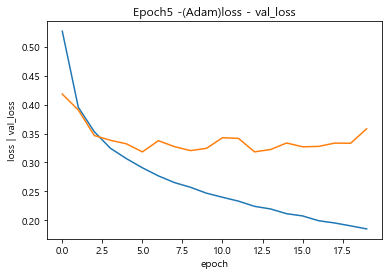

In [48]:
# history 결과를 이용하여 손실곡선 그리기 
# 훈련 손실과 검증 손실 비교 
plt.plot(history.epoch, history.history['loss'], history.history['val_loss'])
plt.title("Epoch5 -(Adam)loss - val_loss")
plt.xlabel("epoch")
plt.ylabel("loss | val_loss")
plt.savefig("./images/01_Epoch20_(Adam)loss&val_loss", dpi=300)
plt.show()


In [51]:
# 그래프 해석 : 벌어지는 지점 => 과대 적합이 일어나는 부분 
# 전체적으로 계속 벌어진다 -> 과대적합이 일어나고 있다 
# 최적의 epoch => 벌어지기 시작하느 지점 -> 최적의 epoch


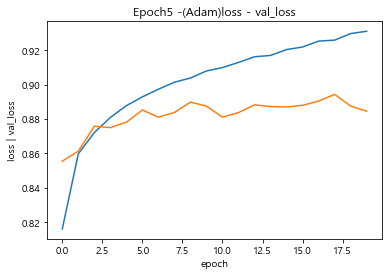

In [54]:
# 훔련 및 검증 정호가도 비교하기 
plt.plot( history.history['accuracy'])
plt.plot( history.history['val_accuracy'])

plt.title("Epoch5 -(Adam)loss - val_loss")
plt.xlabel("epoch")
plt.ylabel("loss | val_loss")
plt.savefig("./images/01_Epoch20_(Adam)loss&val_loss", dpi=300)
plt.show()

## 성능 규제 방법

과대적합을 해소하는 방법 : 성능 규제 방법
#### 드롭아웃(Dropout)
##### 성능향상방법 중 한가지, 신경망에서 대표적 규제방법(전처리계층으로 사용함)

In [55]:
"""
드롭아웃[Dropout]
- 훈련과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 과대적합을 막는 방법
- 뉴런을 끈다는 것은 출력을 0으로 만든다는 의미 (일시적으로 훈련에 참여시키지 않음)
- 너무 똑똑해지는 것을 방지하는 것 ( 조금은 멍청하게 만들기)

<드롬 아웃이 왜 과대적합을 막을까?>
 - 이전 층의 일부 뉴런이 랜덤하게 꺼지면, (일부러 랜덤하게 참여를 막아버림)
 - 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고, 
 - 모든 입력에 대해 주의를 기울이게 되어,
 - 더욱 안정적인 예측을 만들 수 있다는 개념이 적용됨
 
- 중간에 은닉층(hidden layer)으로 추가하여 사용됨 
- 최종 출력층에서는 일시적으로 참여를 막았던 뉴런들을 다시 활성화 시켜서 
    훈련에 참여시킴(모든 뉴런 정상화)
- Dropout은 구글과 제프리 힌턴에 의해 2016념도에 특허등록되어 있음 

"""

'\n드롭아웃[Dropout]\n- 훈련과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 과대적합을 막는 방법\n- 뉴런을 끈다는 것은 출력을 0으로 만든다는 의미 (일시적으로 훈련에 참여시키지 않음)\n- 너무 똑똑해지는 것을 방지하는 것 ( 조금은 멍청하게 만들기)\n'

In [31]:
# 드롭아웃 전처리 계층 생성하기 
# - 0.3의 의미 : 30% 정도를 랜덤하게 드롭아웃 처리 
# - 전처리 계층 : PAram = 0 인 경우 모두 전처리 계층 
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [32]:
# 모델 설정하기 : 컴파일 
#  옵티마이저 adam 사용
# 훈련 및 검증 동시에 수행하기 
# 훈련및 손실 곡선 그리기 
# 훈련 및 검증에 대한 정확도 곡선 그리기 
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics="accuracy")
history = model.fit(train_scaled, train_target, epochs=10,verbose=1,
                      validation_data=(val_scaled, val_target))

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5938 - accuracy: 0.7898 - val_loss: 0.4307 - val_accuracy: 0.8436
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4409 - accuracy: 0.8420 - val_loss: 0.3883 - val_accuracy: 0.8618
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4015 - accuracy: 0.8547 - val_loss: 0.3642 - val_accuracy: 0.8685
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3774 - accuracy: 0.8608 - val_loss: 0.3501 - val_accuracy: 0.8726
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3642 - accuracy: 0.8668 - val_loss: 0.3423 - val_accuracy: 0.8723
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3510 - accuracy: 0.8724 - val_loss: 0.3320 - val_accuracy: 0.8792
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3423 - accuracy: 0.8738 - val_loss: 0.3265 - val_accuracy:

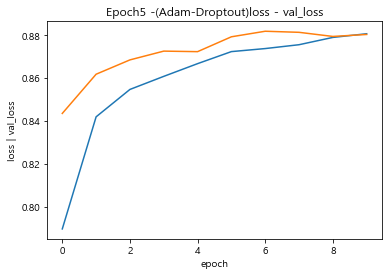

In [33]:
plt.plot( history.history['accuracy'])
plt.plot( history.history['val_accuracy'])

plt.title("Epoch5 -(Adam-Droptout)loss - val_loss")
plt.xlabel("epoch")
plt.ylabel("loss | val_loss")
plt.savefig("./images/01_Epoch20_(Adam-Dropout)loss&val_loss", dpi=300)
plt.show()

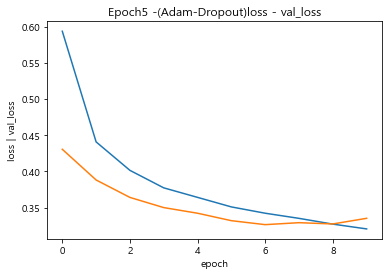

In [34]:
plt.plot(history.epoch, history.history['loss'], history.history['val_loss'])
plt.title("Epoch5 -(Adam-Dropout)loss - val_loss")
plt.xlabel("epoch")
plt.ylabel("loss | val_loss")
plt.savefig("./images/01_Epoch20_(Adam-Dropout)loss&val_loss", dpi=300)
plt.show()

In [35]:
print_history(history)

epoch= 0 train_loss= 0.5938 train_accuracy= 0.7898 val_loss= 0.4307 val_accuracy= 0.8436
epoch= 1 train_loss= 0.4409 train_accuracy= 0.842 val_loss= 0.3883 val_accuracy= 0.8618
epoch= 2 train_loss= 0.4015 train_accuracy= 0.8547 val_loss= 0.3642 val_accuracy= 0.8685
epoch= 3 train_loss= 0.3774 train_accuracy= 0.8608 val_loss= 0.3501 val_accuracy= 0.8726
epoch= 4 train_loss= 0.3642 train_accuracy= 0.8668 val_loss= 0.3423 val_accuracy= 0.8723
epoch= 5 train_loss= 0.351 train_accuracy= 0.8724 val_loss= 0.332 val_accuracy= 0.8792
epoch= 6 train_loss= 0.3423 train_accuracy= 0.8738 val_loss= 0.3265 val_accuracy= 0.8818
epoch= 7 train_loss= 0.3352 train_accuracy= 0.8756 val_loss= 0.3293 val_accuracy= 0.8813
epoch= 8 train_loss= 0.3273 train_accuracy= 0.879 val_loss= 0.3275 val_accuracy= 0.8794
epoch= 9 train_loss= 0.3206 train_accuracy= 0.8807 val_loss= 0.3353 val_accuracy= 0.8803


## 모델 저장하기 

In [36]:
# (모델 저장 방법 - 1) => 모델을 개선 할 계획인 경우 주로 사용 
# save_weights()
# - 훈련에 사용된 가중치 (weight) 및 절편 값만 저장 시킴
# - 읽어들일 때는 load_weight()함수를 이용해야 함 

model.save_weights("./model/model_weights.h5")

In [37]:
# 모델 저장 방버 - 2 => 주로사용
# save()
# - 훔련모델 자체 (가중치 및 절편 포함한 모든 속성)를 저장
# - 읽어들일 때는 load_model() 함수를 사용해야 함 
model.save("./model/model_whole.h5")

In [39]:
# save_weight()으로 지정한 모델 사용하기  
# - 먼저 모델 구조를 생성해 주어야 함 
# 생성한 모델에 저장한 모델을 읽어 들여서 저장된 가중치와 절편 적용 
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

# 생성된 모델에 저장한 가중치와 절편 적용하기 
model.load_weights("./model/model_weights.h5")

# dlgn qkdqjqdms zjavkdlf > 럇 > tjdsmdvudrk > 기존과 동일하게 진행 


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [47]:
# 예측하기 
# 1차원 데이터로 만들기 
len(model.predict(val_scaled)[0])

import numpy as np
# np.argmax() : 가장 큰 값 추출하는 함수 
# - axis = 1 : 컬럼단위 추출 (10개 컬럼 데이터를 의미함)
val_lavels = np.argmax(model.predict(val_scaled), axis=1)
print(val_lavels)
print(len(val_lavels))
print(val_target)

[8 8 7 ... 8 8 6]
12000
[8 8 7 ... 8 8 1]


In [85]:
# 정확도와 오답률을 계산하기 
list_v = np.equal(val_lavels, val_target)
list_len = np.unique(list_v, return_counts=True)
list_len
x = list_len[1][0]
o = list_len[1][1]
print(o,x)
print(o/len(val_target) * 100 , x/len(val_target)* 100)

10564 1436
88.03333333333333 11.966666666666667


In [51]:
# 답
o, x = 0, 0
for i in range(0, len(val_target),1) :
    if val_target[i] == val_lavels[i] :
        o += 1
    else :
        x += 1 
print (o,x) 
print(o/len(val_target) * 100 , x/len(val_target)* 100)

10564 1436
88.03333333333333 11.966666666666667


In [52]:
# save()로 저장된 모델 읽어들이기 
model = keras.models.load_model("./model/model_whole.h5")
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3353 - accuracy: 0.8803


[0.33528992533683777, 0.8803333044052124]

In [53]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


## 성능향상 방법

### 콜백(callback) 함수 

In [54]:
"""
[콜백 (callback) 함수]
- 모델 훈련 중간에 특정 작업(함수)를 호출 할 수 있는 기능 
- fit() 함수 내에 속성으로 정의하고, 콜백할 함수 이름을 리스트로 정의 

"""

'\n[콜백 (callback) 함수]\n- 모델 훈련 중간에 특정 작업(함수)를 호출 할 수 있는 기능 \n- fit() 함수 내에 속성으로 정의하고, 콜백할 함수 이름을 리스트로 정의 \n\n'

### ModelCheckpoint() 콜백 함수 

In [57]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics="accuracy")

# ModelCheckPoint() 콜백 함수 정의하기 
# - epoch 실행시 마다 (훈련모델)을 저장하는 함수 

# - save_best_only = True 
#     :앞서 저장된 훈련 모델의 [훈련손실]이 [검증 손실] 보다 
#     향상된 경우에만 자동 저장함
#     => 기존모델보다 향상된 경우 저장

# -save_best_only = False 
#     :epoch 마다 훈련 모델을 저장시킴 
        
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best_model.h5",
                                               save_best_only=True)

# 훈련 시 콜백 함수 속성 지정하기 
model.fit(train_scaled,train_target, epochs=20, verbose=1,
         validation_data=(val_scaled,val_target),
         callbacks=[checkpoint_cb])

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5979 - accuracy: 0.7897 - val_loss: 0.4253 - val_accuracy: 0.8487
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4435 - accuracy: 0.8409 - val_loss: 0.3972 - val_accuracy: 0.8543
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4091 - accuracy: 0.8507 - val_loss: 0.3707 - val_accuracy: 0.8633
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3871 - accuracy: 0.8583 - val_loss: 0.3593 - val_accuracy: 0.8704
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3708 - accuracy: 0.8642 - val_loss: 0.3498 - val_accuracy: 0.8741
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3577 - accuracy: 0.8705 - val_loss: 0.3360 - val_accuracy: 0.8752
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3463 - accuracy: 0.8718 - val_loss: 0.3274 - val_accuracy:

In [58]:
# 저장된 best 모델 불러들이기 
model = keras.models.load_model("./model/best_model.h5")
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3126 - accuracy: 0.8873


[0.3126406967639923, 0.8872500061988831]

## EarlyStopping() 콜백함수 

In [74]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics="accuracy")

# ModleCheckPoint() 몰백함수 정의
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best_model.h5",
                                               save_best_only=True)

# EarlyStopping() 콜백함수 정의 => 성능규제 -> 제약을 두는 것 
"""
- 성능규제 함수로 사용됨 : 조기종료 시키는 기능
- 일정 epoch 동안 [검증손실]이 향상되지 않으면, 훈련을 멈춤
- 선택적으로 최상의 모델을 복원할 수도 있음(refore_best_weight=True)
- 체크포인트 저장 콜백(MoelCheckPoint)함수 와 함께 사용하면 효율적으로 훈련가능 
- 모델이 향상되지 ㅏㅇㄶ으면 훈련이 자동으로 중지됨
    epoch의 숫자를 크게 지정해도 됨 
- ** 과대적합이 시작되기 전에 훈련을 미리 조기 종료 시킴 ** 
"""
# patience : 중단하기 전에 기다려야 하는 epoch 함수 
# - 종료 시점 이후에 지정된 숫자만큼 훈련을 더 진행 
#  - 더 진행해도 손실률에 변화가 없으면 훈련 종료 시킴
# restore_best_weights =True 
# - 가장 낮은 검증 손실을 낸 모델이 하이퍼 파라미터 값들로 수정(복원) 함 
# 최상의 가중치를 복원해 주기 때문에,
# ㅓ장된 모델을 따로 복원하지 않아도 됨( 모델 그대로 사용)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, 
                                                restore_best_weights=True)


# 훈련 시 콜백 함수 속성 지정하기 
history = model.fit(train_scaled,train_target, epochs=50, verbose=1,
          validation_data=(val_scaled,val_target),
          callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5983 - accuracy: 0.7905 - val_loss: 0.4303 - val_accuracy: 0.8489
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4399 - accuracy: 0.8436 - val_loss: 0.3772 - val_accuracy: 0.8638
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4054 - accuracy: 0.8546 - val_loss: 0.3669 - val_accuracy: 0.8652
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3813 - accuracy: 0.8614 - val_loss: 0.3567 - val_accuracy: 0.8699
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3654 - accuracy: 0.8664 - val_loss: 0.3503 - val_accuracy: 0.8726
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3556 - accuracy: 0.8706 - val_loss: 0.3351 - val_accuracy: 0.8798
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3437 - accuracy: 0.8740 - val_loss: 0.3412 - val_accuracy:

In [75]:
# epoch 최종값 확인하기 
early_stopping_cb.stopped_epoch - 1 

8

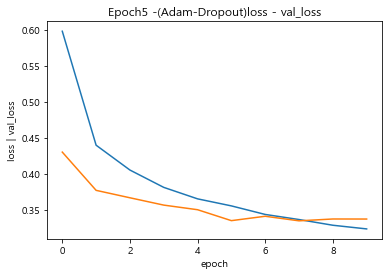

In [76]:
# 훈련 및 검증 손실곡선 비교하기 
# model = keras.models.load_model("./model/best_model.h5")

plt.plot(history.epoch, history.history['loss'], history.history['val_loss'])
plt.title("Epoch5 -(Adam-Dropout)loss - val_loss")
plt.xlabel("epoch")
plt.ylabel("loss | val_loss")
plt.savefig("./images/01_Epoch20_(Adam-Dropout)loss&val_loss", dpi=300)
plt.show()


In [77]:
# 모델 성능평가 
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3348 - accuracy: 0.8760


[0.3348396122455597, 0.8759999871253967]